<a href="https://colab.research.google.com/github/Athena2262/Toxic_comment_classification/blob/main/toxic_comment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow pandas matplotlib scikit-learn


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4134811015253974868
xla_global_id: -1
]


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_csv("/content/train1.csv")

In [ ]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [ ]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
MAX_FEATURES = 40000

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=200,
                               output_mode='int')

In [ ]:
type(X.values)

numpy.ndarray

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([325, 239, 231,   9, 307])>

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
len(X)

10417

In [ ]:
vectorized_text

<tf.Tensor: shape=(10417, 200), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [37603,    53,  2193, ...,     0,     0,     0],
       [  492,   452,    69, ...,     0,     0,     0],
       ...,
       [31487, 35050,     9, ...,     0,     0,     0],
       [ 7284,    38,   242, ...,     0,     0,     0],
       [   69,   166,   578, ...,     0,     0,     0]])>

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(10417)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
batch_X,batch_y = dataset.as_numpy_iterator().next()

In [ ]:
batch_y.shape

(16, 6)

In [ ]:
int(len(dataset)*.7)

456

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
len(train)

456

In [ ]:
len(test)

65

In [ ]:
len(val)

130

In [ ]:
train_generator = train.as_numpy_iterator()

In [ ]:
train_generator.next()

(array([[   82,    23,    12, ...,     0,     0,     0],
        [   15,    11,  1042, ...,     0,     0,     0],
        [ 4244,  1996,     2, ...,    16, 16847,  9254],
        ...,
        [15755,     8,    19, ...,     0,     0,     0],
        [    6,    68,   851, ...,     0,     0,     0],
        [   14,   448,    28, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 16))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(16, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Final layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
y.shape

(10417, 6)

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          640016    
                                                                 
 bidirectional (Bidirection  (None, 32)                4224      
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 650902 (2.48 MB)
Trainable params: 650902 (2.48 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
456/456 [==============================] - 37s 74ms/step - loss: 0.1517 - val_loss: 0.0813
Epoch 2/10
456/456 [==============================] - 33s 72ms/step - loss: 0.0745 - val_loss: 0.0529
Epoch 3/10
456/456 [==============================] - 33s 72ms/step - loss: 0.0524 - val_loss: 0.0466
Epoch 4/10
456/456 [==============================] - 33s 72ms/step - loss: 0.0445 - val_loss: 0.0407
Epoch 5/10
456/456 [==============================] - 32s 71ms/step - loss: 0.0395 - val_loss: 0.0323
Epoch 6/10
456/456 [==============================] - 32s 71ms/step - loss: 0.0344 - val_loss: 0.0298
Epoch 7/10
456/456 [==============================] - 32s 71ms/step - loss: 0.0323 - val_loss: 0.0323
Epoch 8/10
456/456 [==============================] - 32s 71ms/step - loss: 0.0304 - val_loss: 0.0268
Epoch 9/10
456/456 [==============================] - 32s 71ms/step - loss: 0.0301 - val_loss: 0.0290
Epoch 10/10
456/456 [==============================] - 32s 70ms/step - loss: 0.027

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
history.history

{'loss': [0.15170013904571533,
  0.07450650632381439,
  0.052434105426073074,
  0.044497713446617126,
  0.0395081527531147,
  0.034397635608911514,
  0.032305583357810974,
  0.0304314736276865,
  0.030099019408226013,
  0.02751780115067959],
 'val_loss': [0.08133739978075027,
  0.05287928506731987,
  0.04659378528594971,
  0.04069620743393898,
  0.03227309137582779,
  0.029752932488918304,
  0.03233540058135986,
  0.02683439292013645,
  0.029040977358818054,
  0.029174773022532463]}

<Figure size 800x500 with 0 Axes>

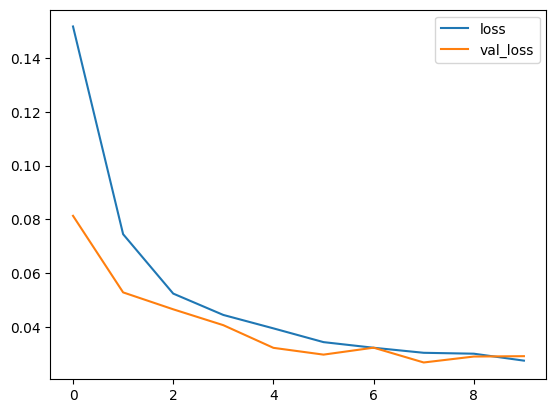

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X,batch_y = test.as_numpy_iterator().next()

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 551ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
test.as_numpy_iterator().next()

(array([[   89,     8,   799, ...,     0,     0,     0],
        [ 1596,     8,   605, ...,     0,     0,     0],
        [   29,   115,  8888, ...,     0,     0,     0],
        ...,
        [13578, 10560,   586, ...,     0,     0,     0],
        [   40,     2,    87, ...,     0,     0,     0],
        [  767,  1457,  4735, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0]]))

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 34ms/step


array([[0.9792069 , 0.17699198, 0.9411775 , 0.03055503, 0.7789026 ,
        0.2247401 ]], dtype=float32)

In [ ]:
test.as_numpy_iterator().next()

(array([[15769,   460,    13, ...,     0,     0,     0],
        [  105,    46,    50, ...,     0,     0,     0],
        [   12,  1092,    48, ...,     0,     0,     0],
        ...,
        [16623,   240,    69, ...,     0,     0,     0],
        [    6,  4223,    29, ...,     0,     0,     0],
        [39495, 28412,   691, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
input_text

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([   6, 6069, 1277,    8,   71,  119,    3, 1462,    6,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [ ]:
np.expand_dims(input_text,0)

array([[   6, 6069, 1277,    8,   71,  119,    3, 1462,    6,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 35ms/step


array([[0.9792069 , 0.17699198, 0.9411775 , 0.03055503, 0.7789026 ,
        0.2247401 ]], dtype=float32)

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X,batch_y = test.as_numpy_iterator().next()

In [ ]:
model.predict(batch_X)

1/1 [==============================] - 0s 36ms/step


array([[1.6812314e-06, 2.8255421e-11, 5.1122806e-06, 7.5415176e-07,
        1.6198186e-06, 1.3600614e-06],
       [1.4227491e-05, 5.6642657e-10, 2.1851540e-05, 4.9616651e-06,
        8.4285621e-06, 7.1543004e-06],
       [4.4988731e-01, 8.2107959e-05, 1.6834209e-02, 8.1613194e-03,
        2.2136368e-02, 5.7664928e-03],
       [3.6450324e-08, 7.8848847e-14, 2.7738787e-07, 2.0333296e-08,
        6.3489480e-08, 5.2293206e-08],
       [9.8453254e-01, 3.1196311e-01, 9.6758831e-01, 3.0802863e-02,
        8.4403592e-01, 2.7316013e-01],
       [1.9791764e-06, 3.0730404e-11, 5.2193986e-06, 8.1413856e-07,
        1.6863345e-06, 1.4174644e-06],
       [2.1748049e-06, 4.6388386e-11, 6.4968408e-06, 9.9903718e-07,
        2.1064563e-06, 1.7971714e-06],
       [2.7188986e-05, 1.3721394e-09, 3.3652748e-05, 8.6056416e-06,
        1.3937097e-05, 1.1912917e-05],
       [9.7781521e-01, 1.7204626e-01, 9.4070935e-01, 3.2038141e-02,
        7.8462070e-01, 2.4292423e-01],
       [1.9507636e-03, 1.5356568e-07,

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 38ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 71ms/step


In [ ]:
res

array([[1.6812314e-06, 2.8255421e-11, 5.1122806e-06, 7.5415176e-07,
        1.6198186e-06, 1.3600614e-06],
       [1.4227491e-05, 5.6642657e-10, 2.1851540e-05, 4.9616651e-06,
        8.4285621e-06, 7.1543004e-06],
       [4.4988731e-01, 8.2107959e-05, 1.6834209e-02, 8.1613194e-03,
        2.2136368e-02, 5.7664928e-03],
       [3.6450324e-08, 7.8848847e-14, 2.7738787e-07, 2.0333296e-08,
        6.3489480e-08, 5.2293206e-08],
       [9.8453254e-01, 3.1196311e-01, 9.6758831e-01, 3.0802863e-02,
        8.4403592e-01, 2.7316013e-01],
       [1.9791764e-06, 3.0730404e-11, 5.2193986e-06, 8.1413856e-07,
        1.6863345e-06, 1.4174644e-06],
       [2.1748049e-06, 4.6388386e-11, 6.4968408e-06, 9.9903718e-07,
        2.1064563e-06, 1.7971714e-06],
       [2.7188986e-05, 1.3721394e-09, 3.3652748e-05, 8.6056416e-06,
        1.3937097e-05, 1.1912917e-05],
       [9.7781521e-01, 1.7204626e-01, 9.4070935e-01, 3.2038141e-02,
        7.8462070e-01, 2.4292423e-01],
       [1.9507636e-03, 1.5356568e-07,

In [ ]:
res.shape

(16, 6)

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 31ms/step


In [ ]:
res.shape

(1, 6)

In [ ]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 36ms/step


In [ ]:
res.shape

(16, 6)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 37ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:0.8452380895614624, Recall:0.894957959651947, Accuracy:0.5692307949066162


In [ ]:
model.save('toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freakin hate you! I am coming to hunt you down')

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


In [ ]:
res

array([[0.9792069 , 0.17699198, 0.9411775 , 0.03055503, 0.7789026 ,
        0.2247401 ]], dtype=float32)

In [ ]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [ ]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)
  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return text

In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freakin hate you! I am coming to hunt you down')

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


In [ ]:
res

array([[0.9915967 , 0.09890584, 0.7362496 , 0.03686884, 0.7078368 ,
        0.07037275]], dtype=float32)

In [ ]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [ ]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)
  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return text

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    return text


In [ ]:
user_input = input("Enter your comment: ")

Enter your comment: Would you both shut up, you don't run wikipedia, especially a stupid kid.


In [ ]:
results = score_comment(user_input)

1/1 [==============================] - 0s 31ms/step


In [ ]:
print(results)

toxic: True
severe_toxic: False
obscene: True
threat: False
insult: False
identity_hate: False

